In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data= pd.read_excel('Data_Train.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.shape

(10683, 11)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
data[data['Route'].isnull()| data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

**EDA and Feature Engineering**

1.Duration

2.Departure 

3.Date of journey 

4.Total stops 

5.Addtional Info 

6.Airline 

7.Source and Destination 

8.Route 

**1. Duration**


In [14]:
def convert_duration(duration):
    if len(duration.split())==2:
        hours=int(duration.split()[0][:-1])
        minutes=int(duration.split()[-1][:-1])
        return hours*60 + minutes
    else:
        return int(duration[:-1])*60

In [15]:
data['Duration']=data['Duration'].apply(convert_duration)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


**2. Departure**

In [16]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])

In [17]:
data['Dep_time_in_hours']=data['Dep_Time'].dt.hour
data['Dep_time_in_minutes']=data['Dep_Time'].dt.minute
data['Arrival_time_in_hours']=data['Arrival_Time'].dt.hour
data['Arrival_time_in_minutes']=data['Arrival_Time'].dt.minute

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-04-28 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-28 05:50:00,2023-04-28 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-28 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-04-28 18:05:00,2023-04-28 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-04-28 16:50:00,2023-04-28 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [19]:
data.drop(['Dep_Time', 'Arrival_Time'], axis=1,inplace=True)

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


**3. Date of Journey**

In [21]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int64)

In [22]:
data['Day']=data['Date_of_Journey'].dt.day
data['Month']=data['Date_of_Journey'].dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,3,1


In [23]:
data.drop('Date_of_Journey',axis=1,inplace=True)


In [24]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,3,1


**4. Total_Stops**

In [25]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
data['Total_Stops']=data['Total_Stops'].map({
    'non-stop': 0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

In [27]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,3,1


**Additional Info**

In [28]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [29]:
data.drop('Additional_Info',axis=1,inplace= True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1


In [30]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

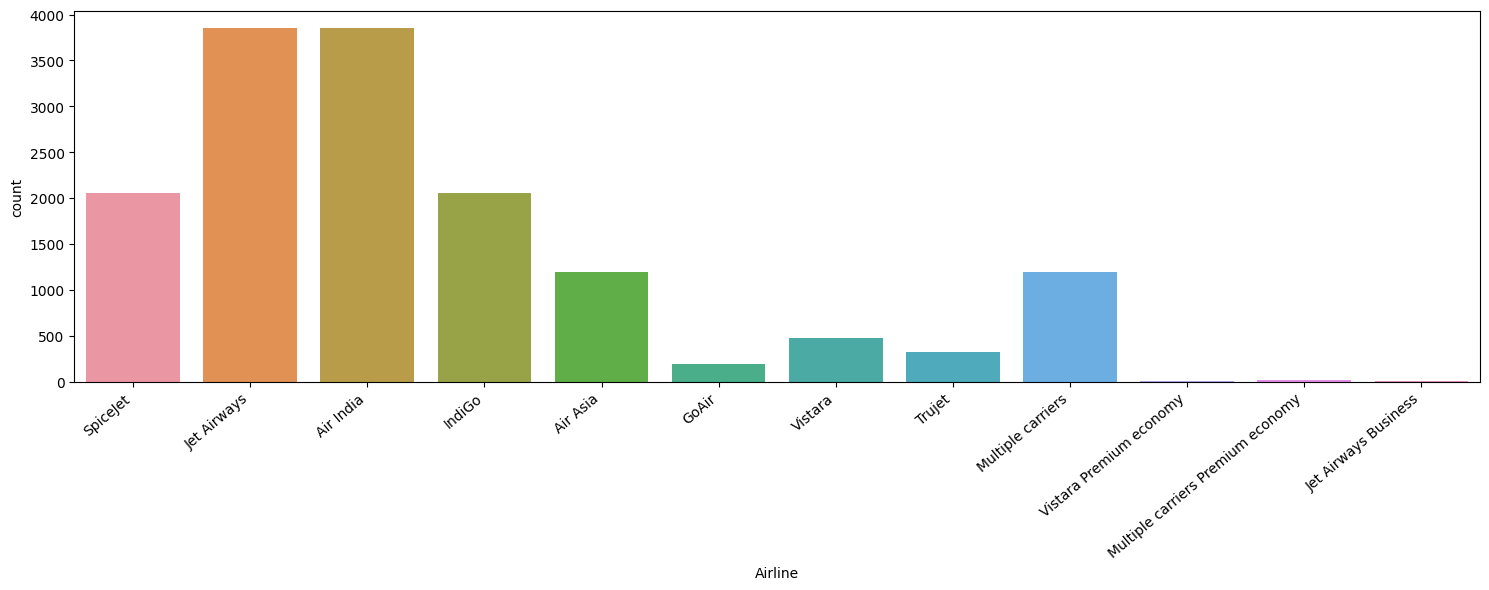

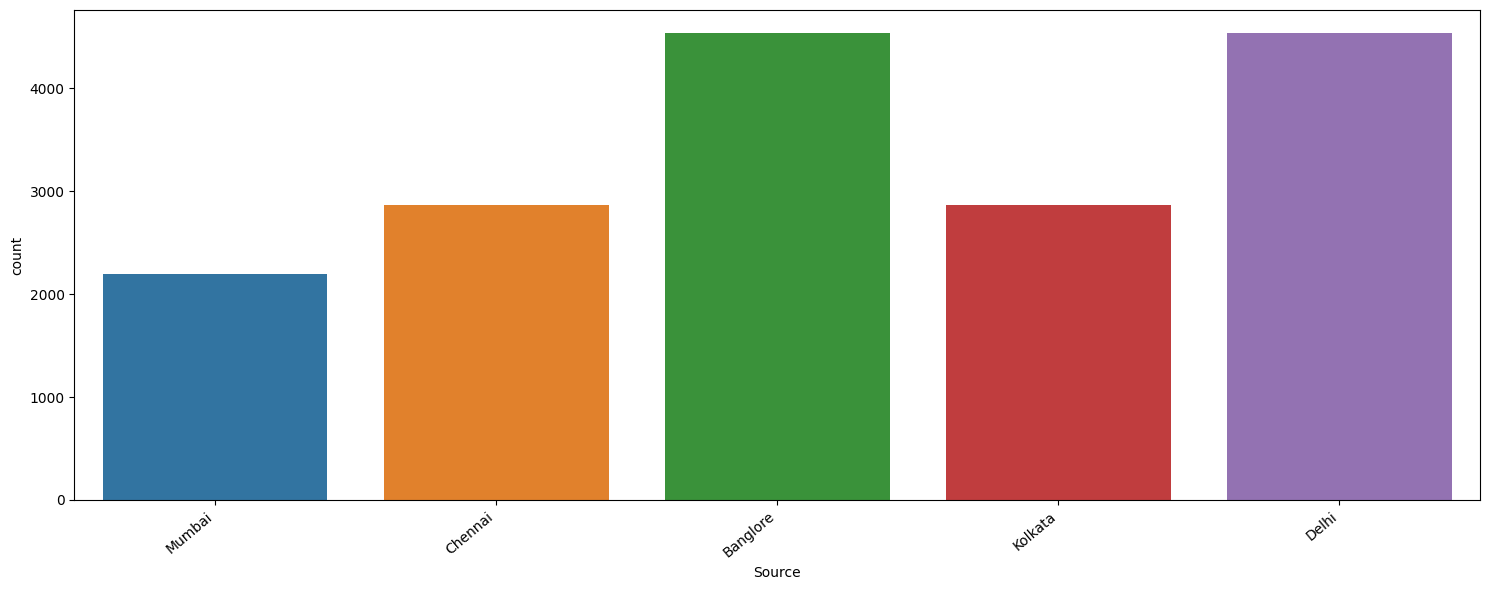

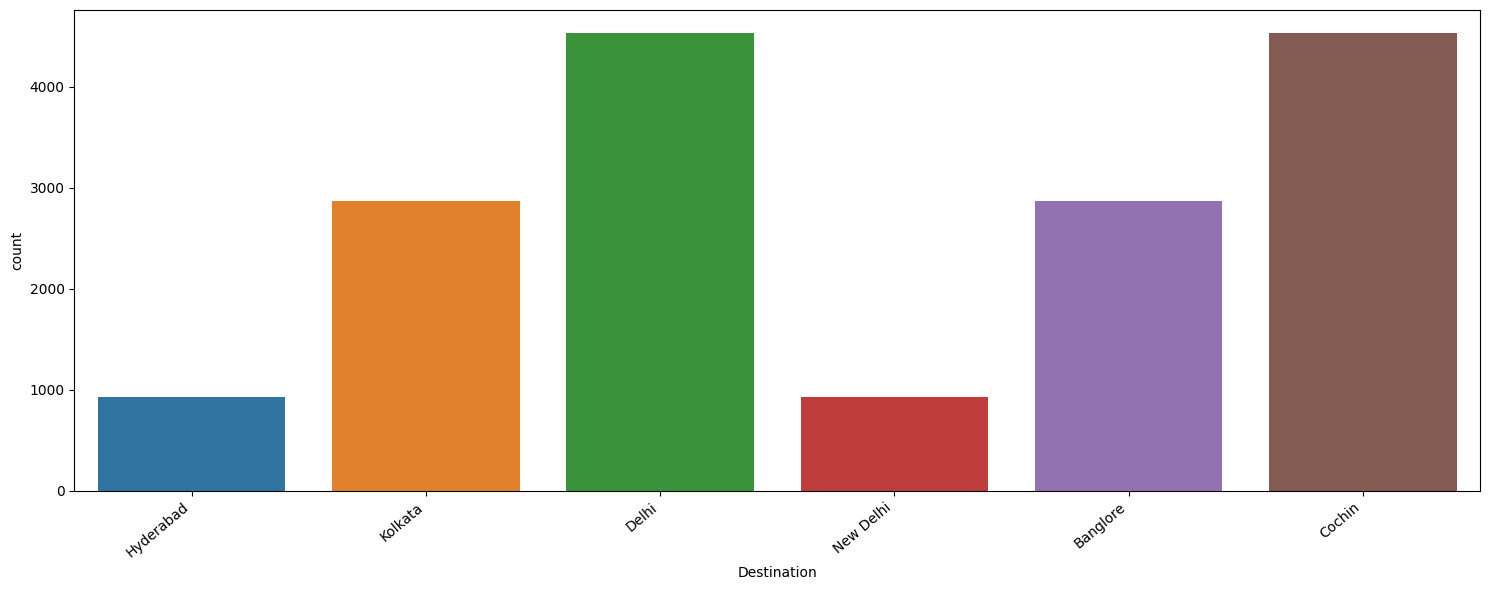

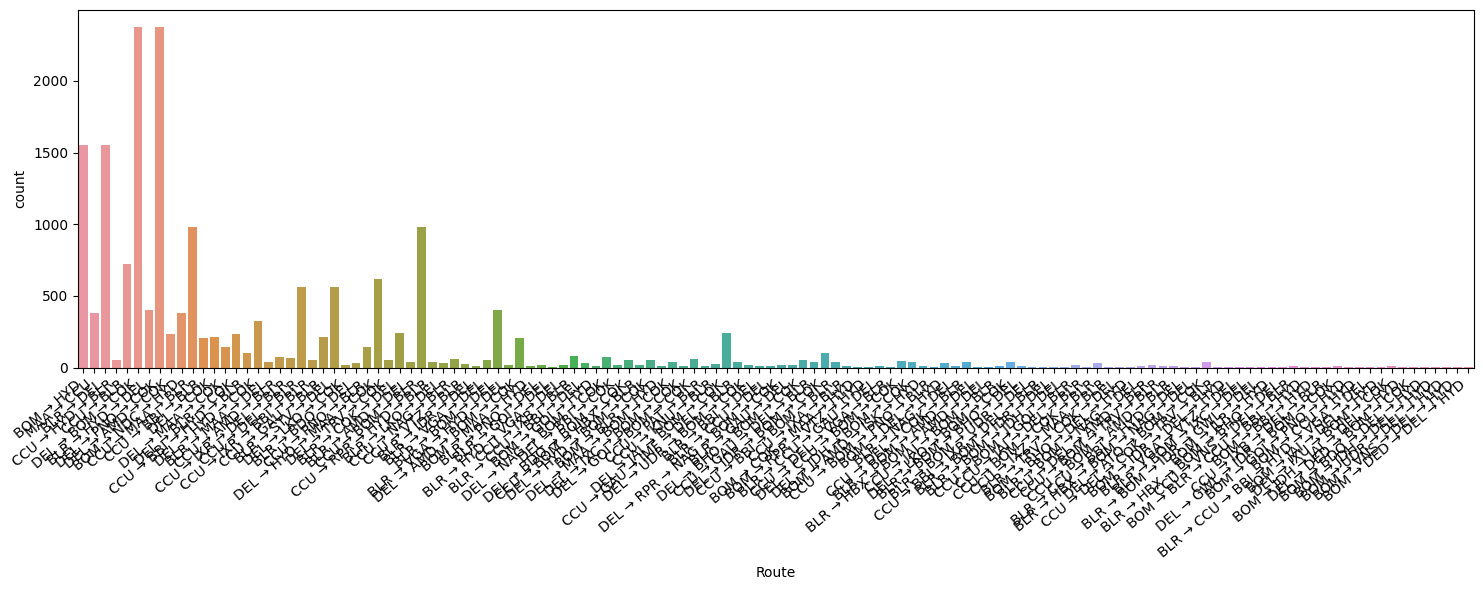

In [31]:
for i in ['Airline','Source','Destination','Route']:
    plt.figure(figsize=(15,6))
    sns.countplot(data=data,x=i)
    ax= sns.countplot(x=i,data=data.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha ='right')
    plt.tight_layout()
    plt.show()
    print('\n\n')
                      

**6. Airline**

In [32]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

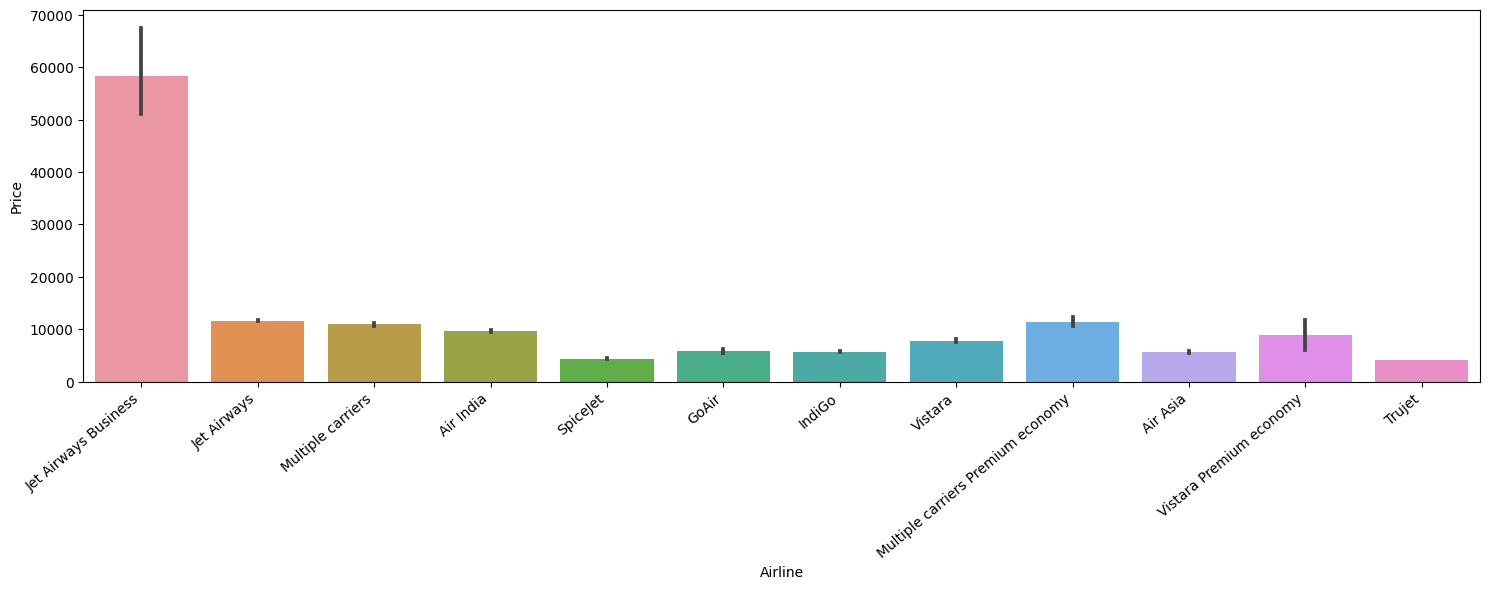

In [33]:
plt.figure(figsize=(15,6))
ax= sns.barplot(x='Airline',y='Price',data=data.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha ='right')
plt.tight_layout()
plt.show()

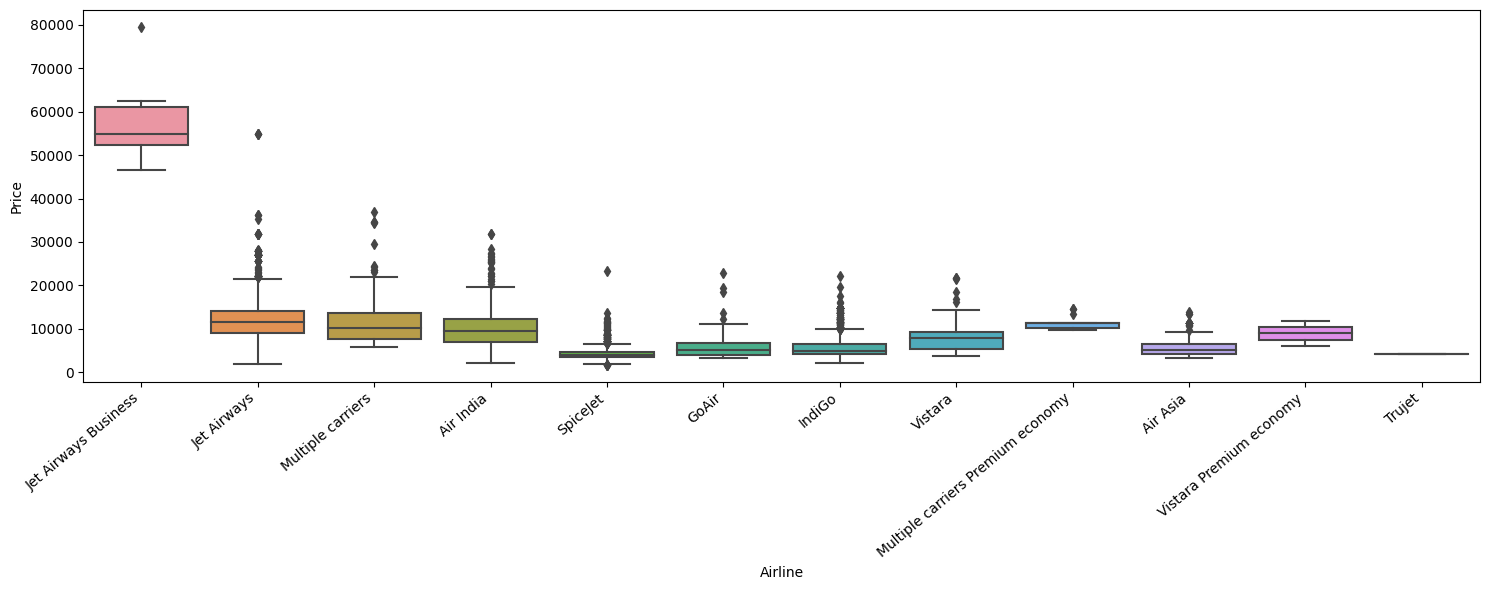

In [34]:
plt.figure(figsize=(15,6))
ax= sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha ='right')
plt.tight_layout()
plt.show()

In [35]:
data.groupby('Airline').describe()['Price'].sort_values('mean', ascending= False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [36]:
Airline=pd.get_dummies(data['Airline'],drop_first= True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
data= pd.concat([data,Airline], axis=1)

In [38]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [39]:
data.drop('Airline',axis=1, inplace= True)

In [40]:
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


**7. Source and Destination**

In [41]:
lst1 = ['Source', 'Destination']
for l in lst1:
    print(data[[l]].value_counts())

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64
Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64


In [42]:
data=pd.get_dummies(data=data,columns=lst1,drop_first= True)
data.head()

,Route,Duration,Total_Stops,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1,...,0,0,0,0,0,0,0,0,0,1


**8. Route**

In [43]:
route= data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [44]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [45]:
route['Route1']= route['Route'].str.split('→').str[0]
route['Route2']= route['Route'].str.split('→').str[1]
route['Route3']= route['Route'].str.split('→').str[2]
route['Route4']= route['Route'].str.split('→').str[3]
route['Route5']= route['Route'].str.split('→').str[4]

In [46]:
route.head()

,Route,Route1,Route2,Route3,Route4,Route5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [47]:
route.fillna('None',inplace= True)
route.head()

,Route,Route1,Route2,Route3,Route4,Route5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [48]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in range(1,6):
    col= 'Route'+str(i)
    route[col]=le.fit_transform(route[col])
route.head()

,Route,Route1,Route2,Route3,Route4,Route5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [49]:
route.drop('Route',axis=1, inplace= True)

In [50]:
route.head()

,Route1,Route2,Route3,Route4,Route5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [51]:
data=pd.concat([data,route],axis=1)

In [52]:
data.head()

,Route,Duration,Total_Stops,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1,...,0,0,0,0,1,0,34,8,13,5


In [53]:
data.drop('Route',axis=1,inplace= True)
data.head()

,Duration,Total_Stops,Price,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,1,0,34,8,13,5


In [54]:
data.dtypes

Duration                             int64
Total_Stops                          int64
Price                                int64
Dep_time_in_hours                    int64
Dep_time_in_minutes                  int64
Arrival_time_in_hours                int64
Arrival_time_in_minutes              int64
Day                                  int64
Month                                int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Source_Chennai                       uint8
Source_Delhi                         uint8
Source_Kolkata                       uint8
Source_Mumb

**Building ML Models & Evaluating Them**

In [55]:
temp_col=data.columns.to_list()
print(temp_col, '\n')

new_col=temp_col[:2] + temp_col[3:]         #dont want the Price column
new_col.append(temp_col[2])
print(new_col,'\n')

data=data.reindex(columns =new_col)
data.head()

['Duration', 'Total_Stops', 'Price', 'Dep_time_in_hours', 'Dep_time_in_minutes', 'Arrival_time_in_hours', 'Arrival_time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5'] 

['Duration', 'Total_Stops', 'Dep_time_in_hours', 'Dep_time_in_minutes', 'Arrival_time_in_hours', 'Arrival_time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Dest

,Duration,Total_Stops,Dep_time_in_hours,Dep_time_in_minutes,Arrival_time_in_hours,Arrival_time_in_minutes,Day,Month,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route1,Route2,Route3,Route4,Route5,Price
0,170,0,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,5,1,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,6,9,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,5,12,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,3,1,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [58]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data=scaler.fit_transform(data)

data[0]

array([-0.93160111, -1.22066609,  1.65415376, -0.2349499 , -1.80043628,
       -0.8900139 ,  1.28553644, -0.84844966, -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -1.67418972,  0.13765097,
        1.39512392,  0.40974412,  0.06420744, -1.12553455])

In [61]:
from sklearn.model_selection import train_test_split as tts

x=data[:,:-1]            # fetch all rows and col except the last one
y=data[:,-1]             # just the Price colm


In [64]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=69)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


In [65]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true,y_pred)**0.5)
    print(f'R_Squared value', r2_score(y_true,y_pred))

def accuracy(y_true,y_pred):
    errors= abs(y_true-y_pred)
    mape=100*np.mean(errors/y_true)
    accuracy=100-mape
    return accuracy

In [67]:
y_pred=model.predict(x_test)

In [68]:
metrics(y_test,y_pred)

RMSE: 0.5363780483159208
R_Squared value 0.6457915146840806


In [69]:
accuracy(y_test,y_pred)

70.27419516719064

**Random Forest**

In [70]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest=RandomForestRegressor(n_estimators=500, min_samples_split=3)
model_random_forest.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [71]:
pred_rf=model_random_forest.predict(x_test)

In [72]:
metrics(y_test,y_pred)

RMSE: 0.5363780483159208
R_Squared value 0.6457915146840806


In [74]:
accuracy(y_test,pred_rf)

99.32109090748438